In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('face.csv')
df.dropna(inplace=True)

# In this dataset,a single person has 10 different images. The 1st person is target 0, 2nd person is target 1 and so on. Each image has 64x64 pixels i.e total 4096 pixels or data points. For the first image,we arrange all the 4096 points in a single row. Same for the second image and so on.

### First read the dataset

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0.0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0.0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0.0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0.0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0.0


## here the target is the dependent variable and pixels are independent

In [4]:
label=df['target']
pixel=df.drop(['target'],axis=1)

## function to show face images

In [5]:
def show_original_images(pixel):
#     fig,axes = plt.subplots(6,10,figsize=(11,7),subplot_kw={'xticks' :[], 'yticks': []})
#     for i,ax in enumerate(axes.flat):
#         ax.imshow(np.array(pixel)[i].reshape(64,64),cmap='gray')
#     plt.show()
    plt.figure(figsize=(12,7))
    for i in range(1,61):
        plt.subplot(6,10,i,xticks=[],yticks=[])
        plt.imshow(np.array(pixel.iloc[i-1,:]).reshape(64,64),cmap='gray')

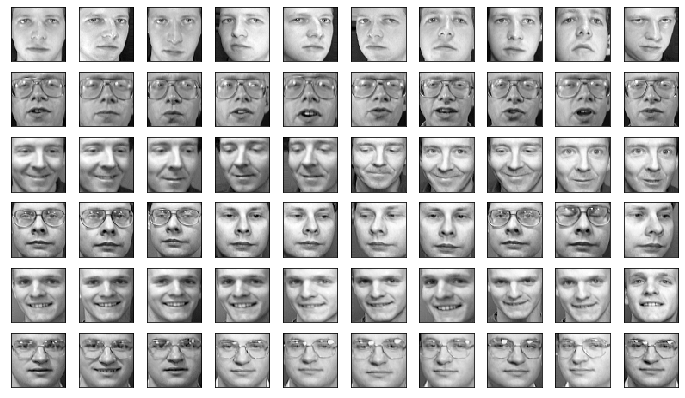

In [6]:
show_original_images(pixel)

# split the data 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(pixel,label,test_size=0.3,random_state=70)

# Perform PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA(n_components=100).fit(xtrain)

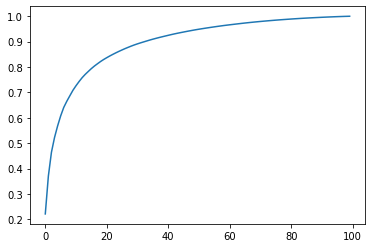

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [40]:
pca.components_[99]

array([ 0.02111375,  0.01846409,  0.02296299, ...,  0.0015188 ,
       -0.00529593, -0.03755262])

In [41]:
def eigen_faces(pca):
#     fig,axes = plt.subplots(6,10,figsize=(15,10),subplot_kw={'xticks' :[], 'yticks': []})
#     for i,ax in enumerate(axes.flat):
#         ax.imshow(pca.components_[i].reshape(64,64),cmap='gray')
#         ax.set_title("PC" + str(i+1))
#     plt.show()
    plt.figure(figsize=(15,10))
    for i in range(1,101):
        plt.subplot(10,10,i,xticks=[],yticks=[])
        plt.imshow(pca.components_[i-1].reshape(64,64),cmap='gray')
        plt.title('PCA'+str(i))

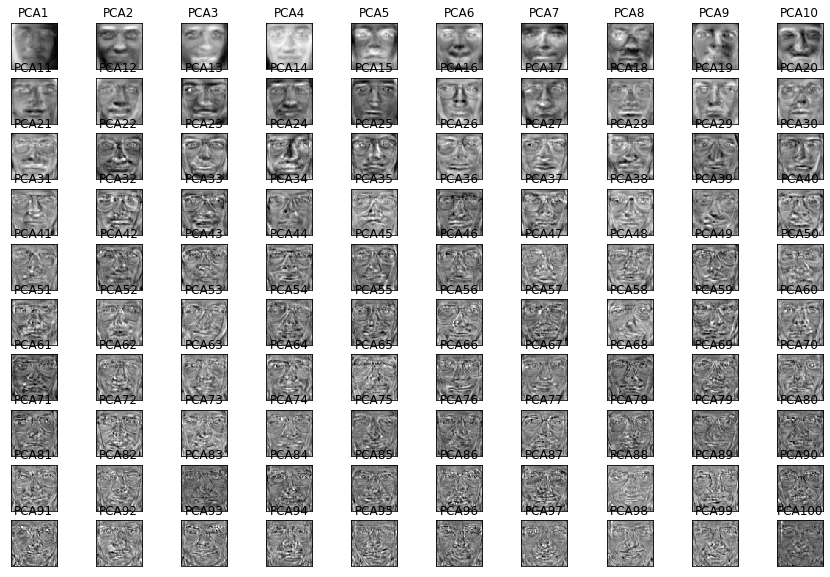

In [42]:
eigen_faces(pca)

# Now project the training data to principal components 

In [14]:
xtrain_pca=pca.transform(xtrain)

# Initialize classifier and fit training data

In [15]:
from sklearn.svm import SVC

In [16]:
classifier=SVC(C=1000,gamma=0.01)

In [17]:
classifier=classifier.fit(xtrain_pca,ytrain)

In [18]:
xtest_pca=pca.transform(xtest)

In [19]:
ypred=classifier.predict(xtest_pca)

# Report

In [20]:
from sklearn.metrics import classification_report

In [21]:
print (classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         5
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         3
         4.0       1.00      0.67      0.80         3
         5.0       0.67      1.00      0.80         2
         6.0       1.00      1.00      1.00         4
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         3
         9.0       1.00      1.00      1.00         4
        10.0       1.00      1.00      1.00         4
        11.0       1.00      1.00      1.00         3
        12.0       1.00      1.00      1.00         2
        13.0       1.00      1.00      1.00         5
        14.0       1.00      1.00      1.00         1

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.97        45
weighted avg       0.99   

In [22]:
np.array(pixel.iloc[0,:]).reshape(64,64)

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]])

# Most important : imshow function of matplotlib.pyplot converts a matrix to image

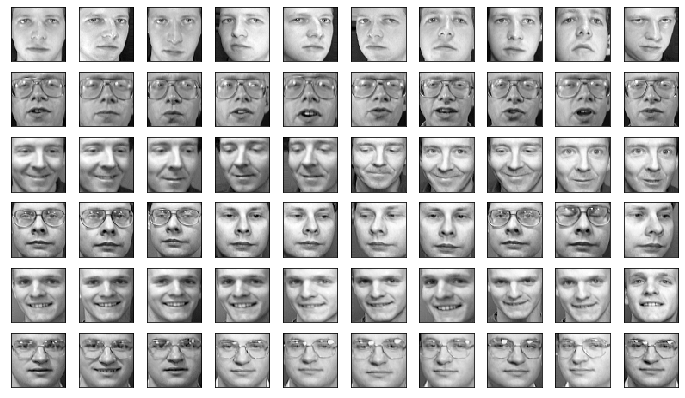

In [23]:
plt.figure(figsize=(12,7))
for i in range(1,61):
    plt.subplot(6,10,i,xticks=[],yticks=[])
    plt.imshow(np.array(pixel.iloc[i-1,:]).reshape(64,64),cmap='gray')